In [1]:
import silq
silq.initialize("EWJN", mode='analysis')
%matplotlib notebook

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
font = {'family' : 'monospace',
        'weight' : 'regular',
        'size'   : 16}

matplotlib.rc('font', **font) 
config['user'].get('matplot', {})['2D_settings']['cmap']='inferno'

<IPython.core.display.Javascript object>

Initializing imports


C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\matplotlib\__init__.py:1398: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


# Set 1

## Tuning

<IPython.core.display.Javascript object>


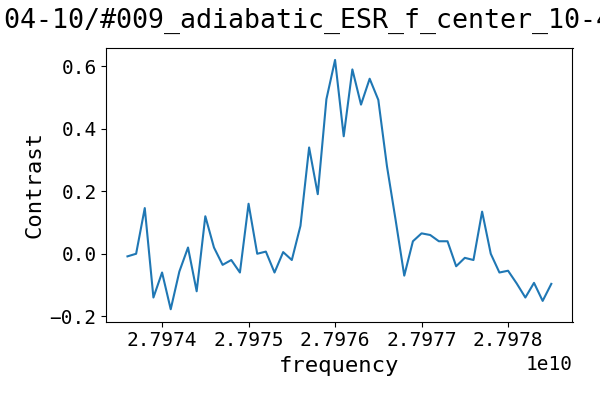

In [2]:
data = qc.load_data('2017-04-10/#009_adiabatic_ESR_f_center_10-48-12')
qc.MatPlot(data.contrast)

<IPython.core.display.Javascript object>


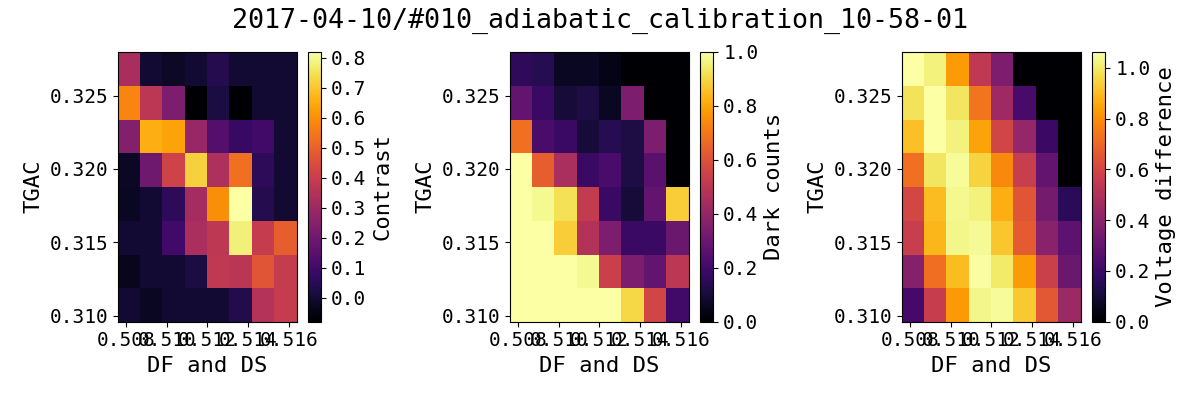

In [3]:
data = qc.load_data('2017-04-10/#010_adiabatic_calibration_10-58-01')
CalibrationPlot(data)

TGAC(0.3175) 
DF_DS(0.51358) 
freq = 27.9762e9

## T1 scans

<IPython.core.display.Javascript object>


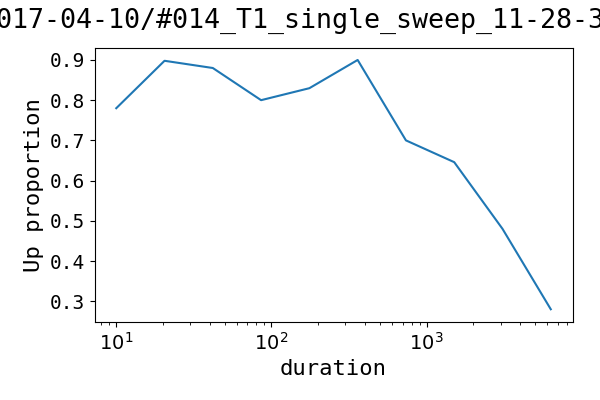

In [4]:
data =  qc.load_data('2017-04-10/#014_T1_single_sweep_11-28-35')
plot = qc.MatPlot(data.up_proportion)
plot[0].set_xscale('log')

<IPython.core.display.Javascript object>


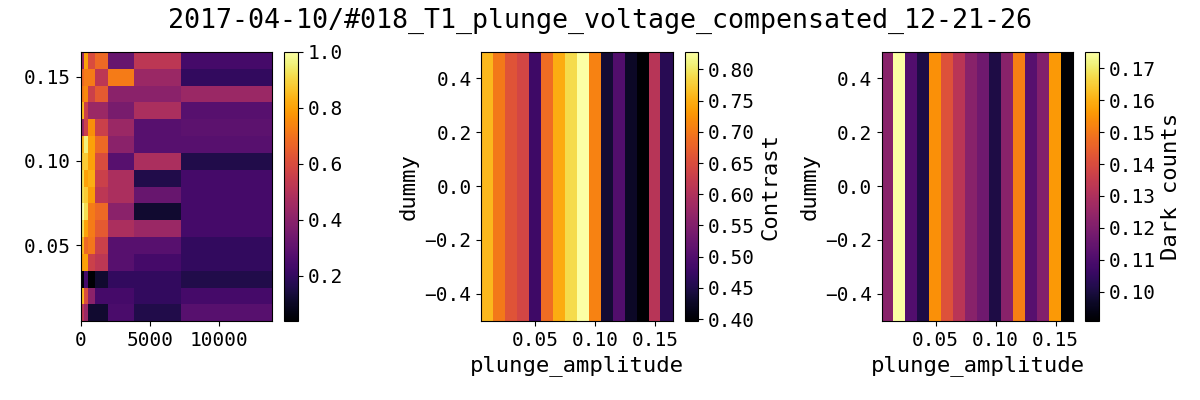

C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [5]:
data = qc.load_data('2017-04-10/#018_T1_plunge_voltage_compensated_12-21-26')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.plunge_amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


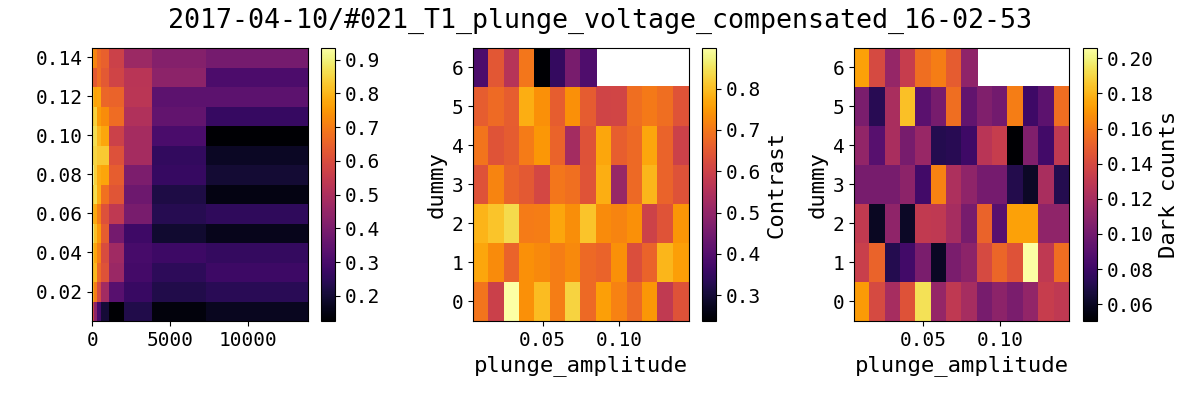

In [6]:
data = qc.load_data('2017-04-10/#021_T1_plunge_voltage_compensated_16-02-53')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.plunge_amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


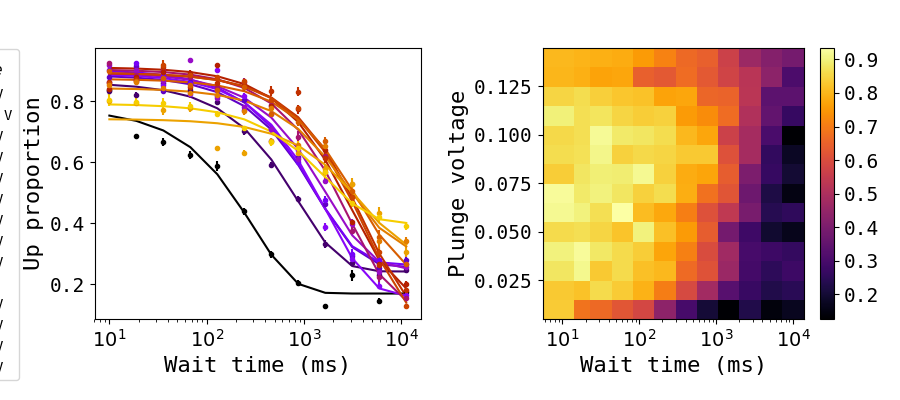

Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6


In [7]:
#purple point T1 plunge depenedence
T1_analysis = T1_Analysis('2017-04-10/#021_T1_plunge_voltage_compensated_16-02-53', T1_label='up_proportion', analyse=False)
data = T1_analysis.dataset

plot = qc.MatPlot(subplots=2)

T1_wait_times = data.duration_set[0][0]
plunge_amplitudes = data.plunge_amplitude_set[0]
up_proportions = np.nanmean(data.up_proportion, 0)
num_not_nan = np.sum(~np.isnan(data.up_proportion), 0)
std = np.nanstd(data.up_proportion, 0) / num_not_nan
purple_T1 = []
purple_T1_std = []
for k, up_proportion in enumerate(up_proportions):
    T1_analysis.analyse_data(T1_data=T1_analysis.dataset.up_proportion[:,k],
                             T1_wait_times=T1_wait_times)
    line, = plot[0].plot(T1_analysis.T1_wait_times, T1_analysis.fit_result.best_fit, color=plt.cm.gnuplot(k/len(up_proportions)))
    plot[0].errorbar(T1_wait_times, up_proportion, yerr=std[k], fmt='o', ms=3, color=line._color,
                     label=r'${:3.2}$s - {} V'.format(T1_analysis.T1/1e3,
                                                      plunge_amplitudes[k]))
    purple_T1.append(T1_analysis.T1)
    purple_T1_std.append(T1_analysis.T1_std)
    
plot[0].set_xscale('log')
legend=plot[0].legend(handlelength=1, title=r'$T_1 - V_{plunge}$', fontsize=10, bbox_to_anchor=(-0.21, 1.02))
plot[0].set_xlabel('Wait time (ms)')
plot[0].set_ylabel('Up proportion')

plot[1].add(np.nanmean(data.up_proportion, 0),
            x=data.duration_set[0],
            y=data.plunge_amplitude_set[0])
plot[1].set_xlabel('Wait time (ms)')
plot[1].set_ylabel('Plunge voltage')
plot[1].set_xscale('log')

plot.tight_layout()
art = []
art.append(legend)
plt.savefig(
    "plungedepexample1.png", additional_artists=art,
    bbox_inches="tight")

## Change in tuning

<IPython.core.display.Javascript object>


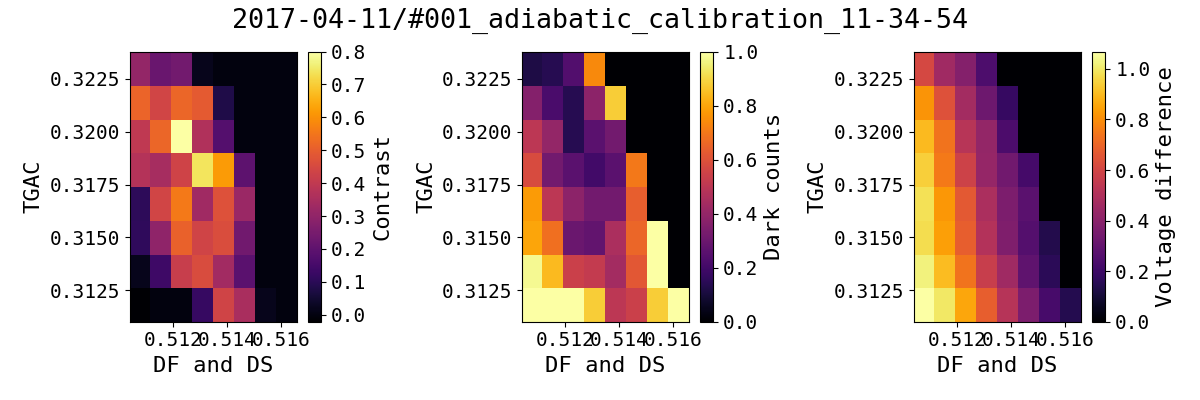

In [8]:
data = qc.load_data('2017-04-11/#001_adiabatic_calibration_11-34-54')
CalibrationPlot(data)

TGAC(0.319813) 
DF_DS(0.512315) 

## T1 scans 2

<IPython.core.display.Javascript object>


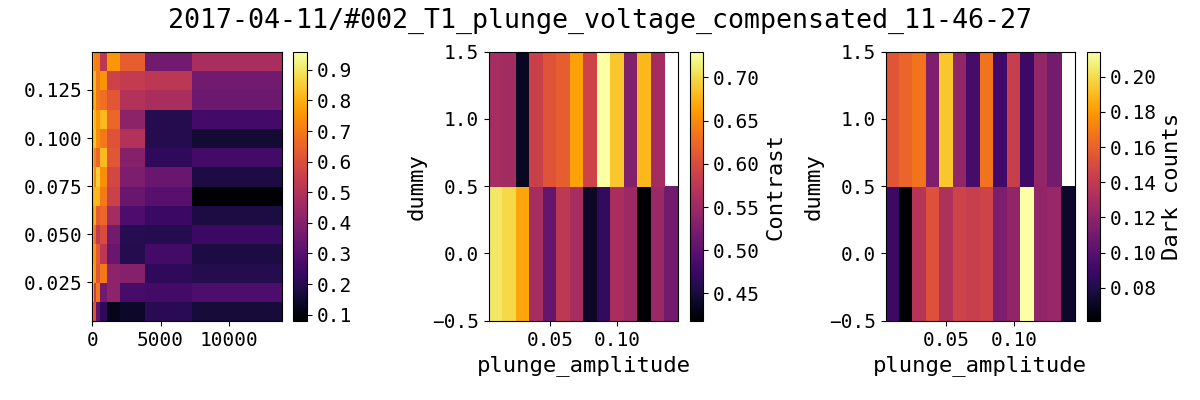

In [9]:
data = qc.load_data('2017-04-11/#002_T1_plunge_voltage_compensated_11-46-27')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.plunge_amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


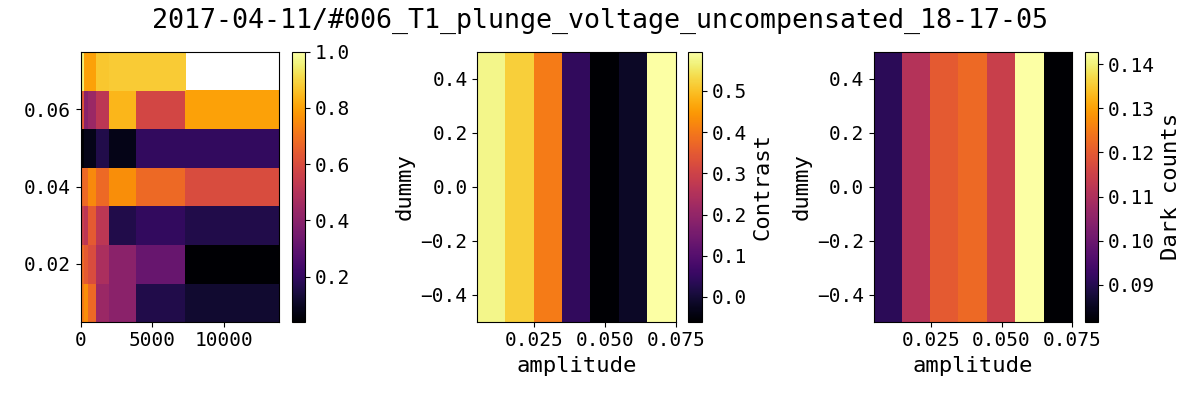

C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [10]:
data = qc.load_data('2017-04-11/#006_T1_plunge_voltage_uncompensated_18-17-05')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


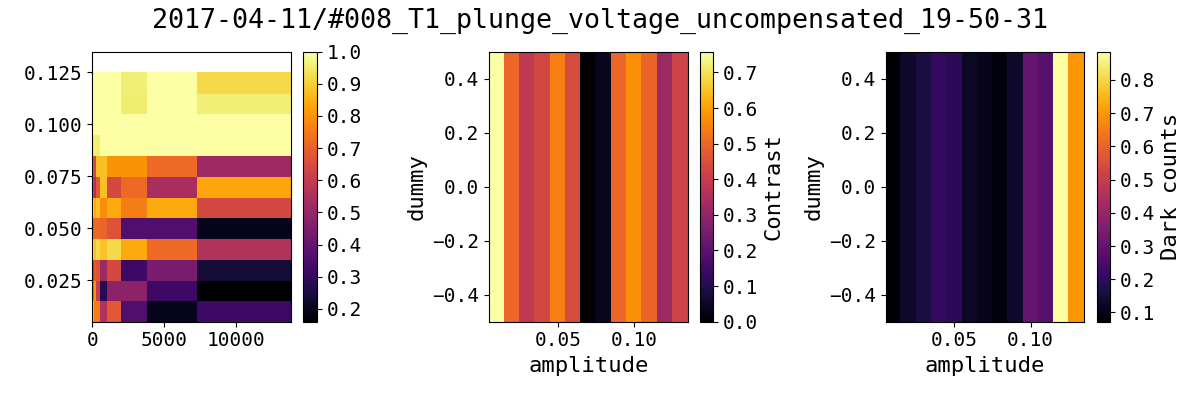

C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [11]:
data = qc.load_data('2017-04-11/#008_T1_plunge_voltage_uncompensated_19-50-31')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


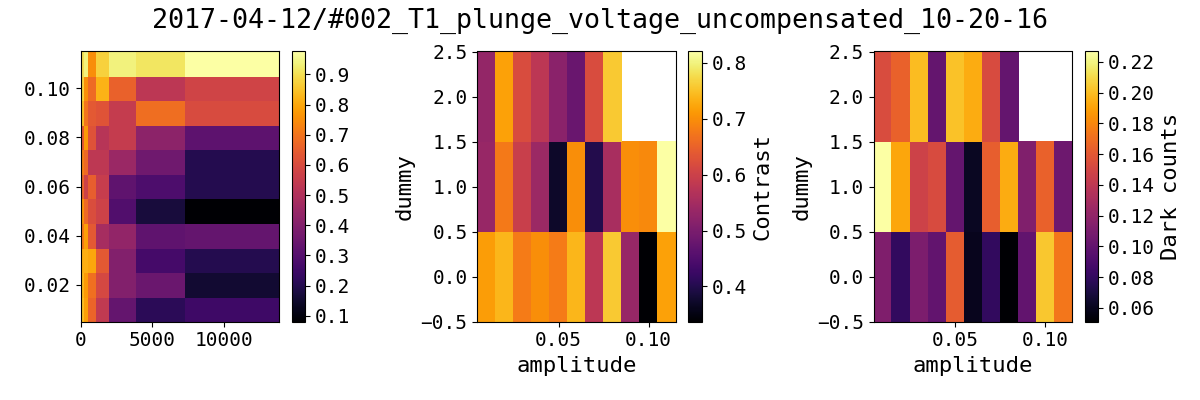

In [12]:
data = qc.load_data('2017-04-12/#002_T1_plunge_voltage_uncompensated_10-20-16')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

## T1 scans 3 (Serwan)

Another scan is set up for easter.
The plunge voltages to be scanned are shown below for compensated (yellow) and uncompensated (orange).
To understand some of the measurements below, it is important to note that there is a second transition on the top right.
This was not known when starting the measurement.

<IPython.core.display.Javascript object>


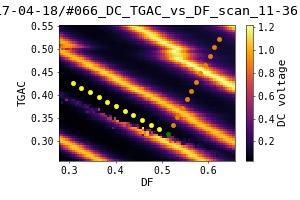

In [162]:
TGAC_sim = data.parameter_info('TGAC')['TGAC']
DF_sim = data.parameter_info('DF_DS')['DF_DS']

# df_arb_steps = data.amplitude_set_0[:]*1/20
# tgac_sweep_points = data.amplitude_set_0[:]*1/24.2

# df_vals = df_arb_steps+df_sim
# tgac_vals = tgac_sweep_points+tgac_sim

data_DC = qc.load_data('2017-04-18/#066_DC_TGAC_vs_DF_scan_11-36-27')
# plt.figure(figsize=(5,4))

plot = qc.MatPlot(data_DC.DC_voltage, interval=0)
# plt.pcolormesh(np.array(data_DC.DF_set), 
#                np.array(data_DC.TGAC_set),
#                data_DC.DC_voltage, cmap='Greys')

plunge_values = np.arange(0.01, 0.12, 0.01)
scales = [[-8/15, 1],
          [1, 8/15]]
for k, scale in enumerate(scales):
    plunge_voltages = [DF_sim + plunge_values / scale[0],
                       TGAC_sim + plunge_values / scale[1]]
    plt.plot(*plunge_voltages, 'o', color=plt.cm.gnuplot(1-k/5))
plt.plot(DF_sim, TGAC_sim, 'og')
# plt.xlabel('Voltage DF (V)')
# plt.ylabel('Voltage TGAC (V)')
# plt.xlim((0.25, 0.65))
# plt.ylim((0.15,0.55))
plot[0].set_aspect('equal')
# plt.colorbar()
# plt.tight_layout()
# plt.savefig('chargestability_diagram_comp.png')



In this measurement, we performed both types of T1 (compensated and perpendicular to compensated).
The sequence is as follows:
```
loop = Loop(dummy_parameter[0:100:1]).each(
    Loop(plunge_voltage_parameter[0.01:0.125:0.01]).each(
        retune_parameter,
        dark_counts_parameter,
        adiabatic_ESR_parameter,
        Loop(T1_duration_parameter[T1_wait_times]).each(
            T1_parameter)),
    Loop(free_plunge_voltage_parameter[0.01:0.125:0.01]).each(
        retune_parameter,
        dark_counts_parameter,
        adiabatic_ESR_parameter,
        Loop(T1_duration_parameter[T1_wait_times]).each(
            T1_parameter)))
```
            
Crucial to these measurements is that prior to each T1 scan for a specific plunge voltage, the system is automatically tuned. 
This means that the SIM voltages are varied until a point with `contrast > 0.65` is found.

The scan is started on Thursday right before easter, and is meant to continue for the entire easter (until Tuesday).

<IPython.core.display.Javascript object>


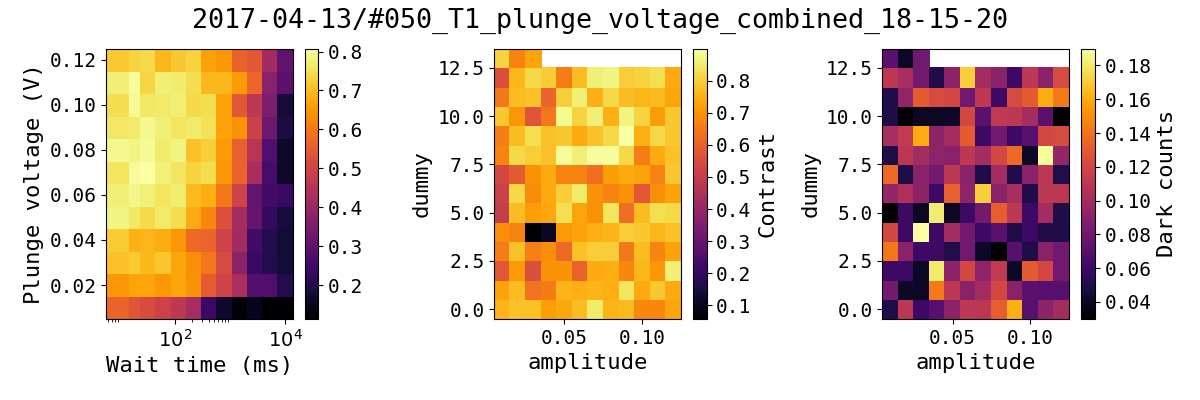

<IPython.core.display.Javascript object>


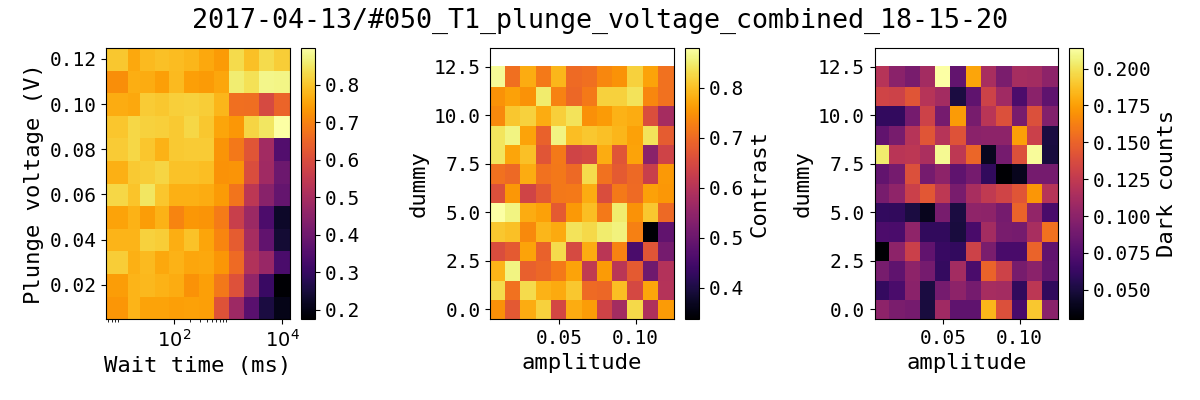

In [53]:
data = qc.load_data('2017-04-13/#050_T1_plunge_voltage_combined_18-15-20')
T1_wait_times = data.duration_set_0_3[0]

plot1 = qc.MatPlot(subplots=(1,3), figsize=(12,4))
plot1[0].add(T1_wait_times, data.amplitude_set_0[0], 
             np.nanmean(data.up_proportion_0_3_0_0, 0))
plot1[0].set_xlabel('Wait time (ms)')
plot1[0].set_ylabel('Plunge voltage (V)')
plot1[0].set_xscale('log')
plot1[1].add(data.contrast_0_2_0)
plot1[2].add(data.dark_counts_0_1_0)
plot1.tight_layout()

plot2 = qc.MatPlot(subplots=(1,3), figsize=(12,4))
plot2[0].add(T1_wait_times, data.amplitude_set_1[0], 
             np.nanmean(data.up_proportion_1_3_0_0, 0))
plot2[0].set_xlabel('Wait time (ms)')
plot2[0].set_ylabel('Plunge voltage (V)')
plot2[0].set_xscale('log')
plot2[1].add(data.contrast_1_2_0)
plot2[2].add(data.dark_counts_1_1_0)
plot2.tight_layout()

The scan stopped on Sunday 4PM due to the TGAC being stuck.
Even though the code is meant to reset a slot if it gets stuck, somehow this still resulted in an error and aborting of the measurement.
However, we can analyse the results until Sunday.

First of all, it can be seen that the contrast remained high for nearly the entire run.
Similarly, the dark counts remained low.
Furthermore, the compensated T1 scan shows an increasing T1 duration with increasing plunge voltage.

The data on the uncompensated plunge voltage is more puzzling.
Instead of seeing the T1 duration reach a stable value very rapidly, we instead also see an increasing T1 with increasing plunge depth.
Even more interesting is what happens at high plunge voltages.
Here, we see that the T1 up proportion stays high. Perhaps this is because it goes over a second coulomb peak?

<IPython.core.display.Javascript object>


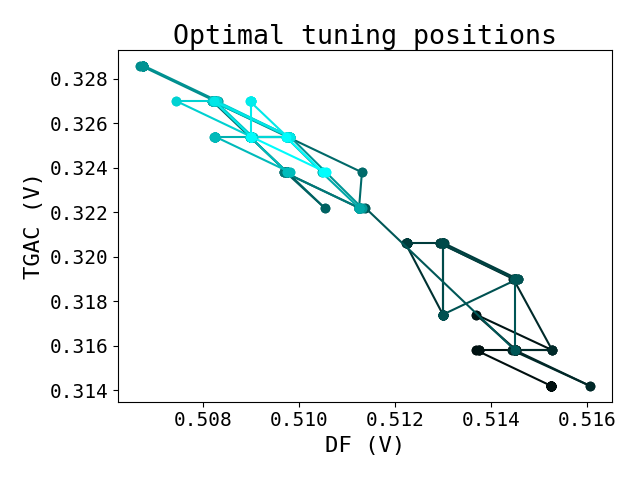

In [54]:
optimal_set_vals = np.concatenate([data.optimal_set_vals_0_0_1,
                                   data.optimal_set_vals_1_0_1],1)
vals = [optimal_set_vals[:12,:,0].flatten(),
        optimal_set_vals[:12,:,1].flatten()]
plt.figure()

# Segement plot and colour depending on T
s = 10 # Segment length
for i in range(0,len(vals[0])-1):
    plt.plot(vals[1][i:i+2], vals[0][i:i+2], 'o-',
            color=(0,i/len(vals[0]),i/len(vals[0])))
# plt.plot(*vals)
plt.xlabel('DF (V)')
plt.ylabel('TGAC (V)')
plt.title('Optimal tuning positions')
plt.tight_layout();

We can also look at the optimal tuning values over time.
Here we clearly see a shift towards higher TGAC, lower DF.

Measurements were restarted Monday afternoon after it was found that the TGAC was stuck.
These measurements continued until Tuesday morning.

<IPython.core.display.Javascript object>


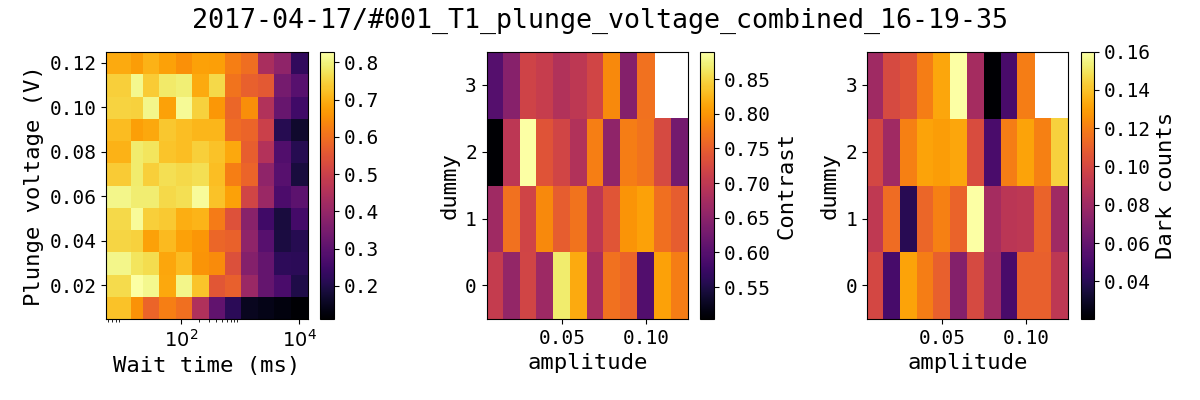

<IPython.core.display.Javascript object>


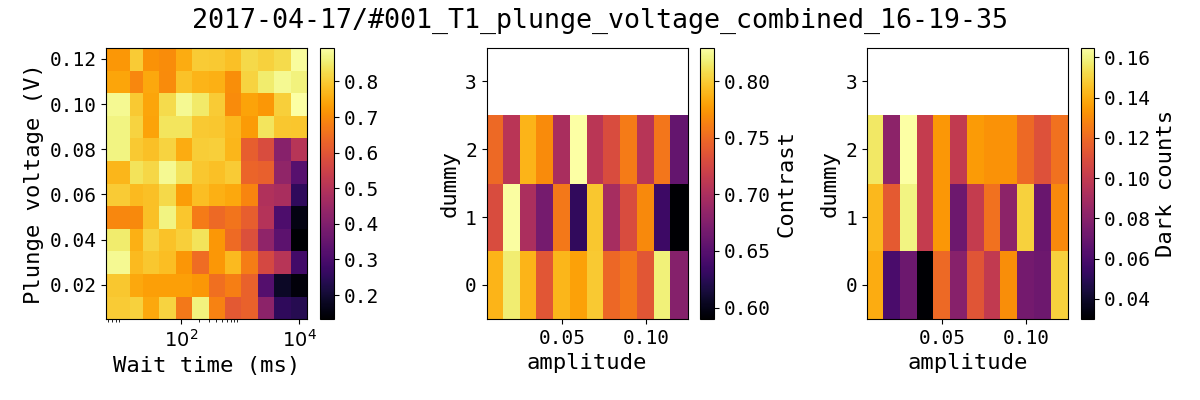

In [50]:
data = qc.load_data('2017-04-17/#001_T1_plunge_voltage_combined_16-19-35')
T1_wait_times = data.duration_set_0_3[0]

plot1 = qc.MatPlot(subplots=(1,3), figsize=(12,4))
plot1[0].add(T1_wait_times, data.amplitude_set_0[0], 
             np.nanmean(data.up_proportion_0_3_0_0, 0))
plot1[0].set_xlabel('Wait time (ms)')
plot1[0].set_ylabel('Plunge voltage (V)')
plot1[0].set_xscale('log')
plot1[1].add(data.contrast_0_2_0)
plot1[2].add(data.dark_counts_0_1_0)
plot1.tight_layout()

plot2 = qc.MatPlot(subplots=(1,3), figsize=(12,4))
plot2[0].add(T1_wait_times, data.amplitude_set_1[0], 
             np.nanmean(data.up_proportion_1_3_0_0, 0))
plot2[0].set_xlabel('Wait time (ms)')
plot2[0].set_ylabel('Plunge voltage (V)')
plot2[0].set_xscale('log')
plot2[1].add(data.contrast_1_2_0)
plot2[2].add(data.dark_counts_1_1_0)
plot2.tight_layout()

## Analysing increasing up proportion

The previous data showed that for high-voltage uncompensated plunging, the up proportion did not decrease with increasing wait duration.
Instead, it seemed to increase.
This suggests one of three things:
1. A sudden increase in T1 time
2. Changing of the ground state to the up state (through a trap?)
3. Electron moves to trap, and then experiences non-spin-dependent tunneling

To test this, we perform a T1 scan at high plunge voltage (0.1V), and also perform the scan without adiabatic inversion.

<IPython.core.display.Javascript object>


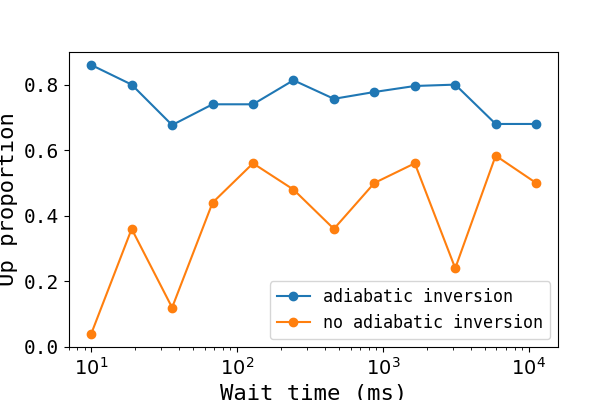

In [59]:
data = qc.load_data('2017-04-18/#068_T1_plunge_voltage_enabled_disabled_12-37-08')

plot = qc.MatPlot()
plot[0].plot(data.duration_set_4[0], np.nanmean(data.up_proportion_4_0_0, axis=0), 'o-', label='adiabatic inversion')
plot[0].plot(data.duration_set_9[0], np.nanmean(data.up_proportion_9_0_0, axis=0), 'o-', label='no adiabatic inversion')
plot[0].set_xscale('log')
plot[0].set_xlabel('Wait time (ms)')
plot[0].set_ylabel('Up proportion')
plot[0].legend(fontsize=12);

Above we see that the contrast decreases slightly for the scan with adiabatic inversion, but also increases for the scan without.
We repeat the scan with the highest plunge voltage measured (0.12V)

<IPython.core.display.Javascript object>


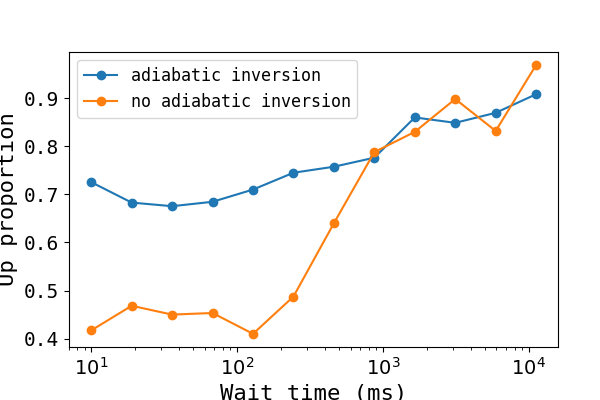

In [61]:
data = qc.load_data('2017-04-18/#078_T1_plunge_voltage_enabled_disabled_13-47-47')

plot = qc.MatPlot()
plot[0].plot(data.duration_set_4[0], np.nanmean(data.up_proportion_4_0_0, axis=0), 'o-', label='adiabatic inversion')
plot[0].plot(data.duration_set_9[0], np.nanmean(data.up_proportion_9_0_0, axis=0), 'o-', label='no adiabatic inversion')
plot[0].set_xscale('log')
plot[0].set_xlabel('Wait time (ms)')
plot[0].set_ylabel('Up proportion')
plot[0].legend(fontsize=12);

These results clearly show a trend towards a higher contrast, even reaching 100% for no adiabatic inversion. This is quite puzzling, and rules out the first of three options.

As a sanity check, we repeat the scan for a lower plunge voltage (0.06V)

<IPython.core.display.Javascript object>


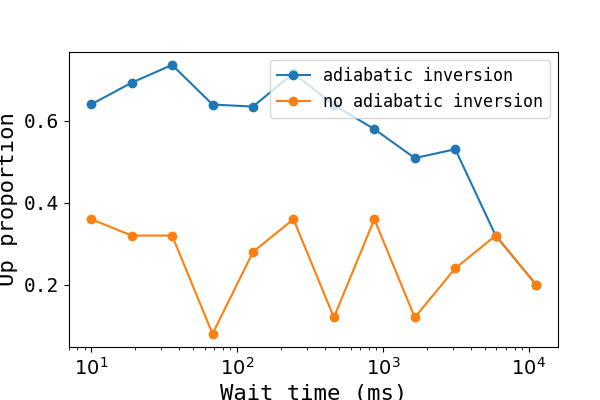

In [63]:
data = qc.load_data('2017-04-18/#096_T1_plunge_voltage_enabled_disabled_16-03-24')

plot = qc.MatPlot()
plot[0].plot(data.duration_set_4[0], np.nanmean(data.up_proportion_4_0_0, axis=0), 'o-', label='adiabatic inversion')
plot[0].plot(data.duration_set_9[0], np.nanmean(data.up_proportion_9_0_0, axis=0), 'o-', label='no adiabatic inversion')
plot[0].set_xscale('log')
plot[0].set_xlabel('Wait time (ms)')
plot[0].set_ylabel('Up proportion')
plot[0].legend(fontsize=12);

Here we clearly see that the up proportion decreases, as we would expect. 

## T1 scans 4 (Serwan)

These scans were for compensated plunging at low plunge voltages to get a nice curve from direct tunneling to co-tunneling

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-04-18/#113_T1_plunge_voltage_17-44-37'
   <Type>   | <array_id>                | <array.name>              | <array.shape>
   Measured | adiabatic_acquisition_ESR | adiabatic_acquisition_ESR | (100, 7)
   Measured | optimal_set_vals          | optimal_set_vals          | (100, 7, 2)
   Measured | num_traces                | num_traces                | (100, 7, 12)
   Measured | retune_parameter_msmts    | retune_parameter_msmts    | (100, 7)
   Measured | dark_counts_1_0           | dark_counts               | (100, 7)
   Measured | voltage_difference        | voltage_difference        | (100, 7)
   Setpoint | dummy_set                 | dummy                     | (100,)
   Setpoint | amplitude_set             | amplitude                 | (100, 7)
   Measured | contrast                  | contrast                  | (100, 7)
   Measured | dark_counts_2_1           | dark_counts               | (100, 7)
   Measured | up_proport

<IPython.core.display.Javascript object>


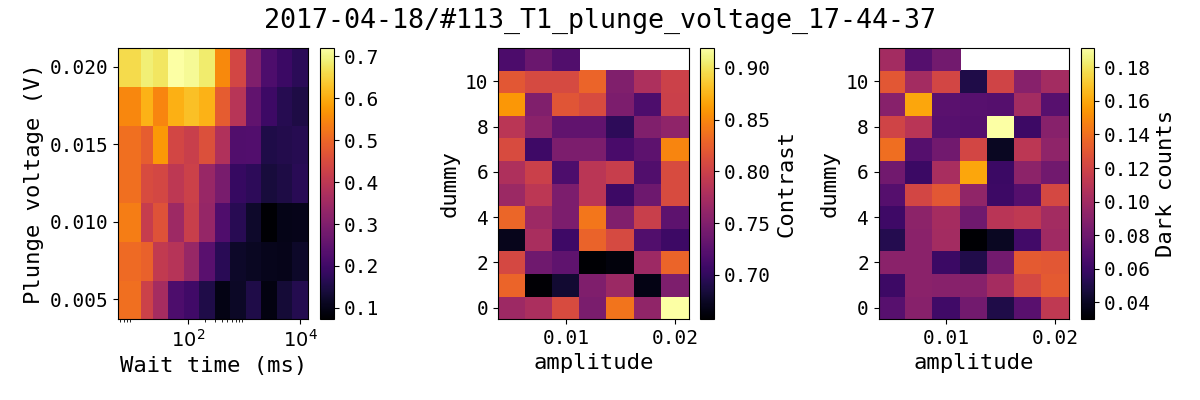

In [127]:
data = qc.load_data('2017-04-18/#113_T1_plunge_voltage_17-44-37')
print(data)
T1_wait_times = data.duration_set[0]

plot1 = qc.MatPlot(subplots=(1,3), figsize=(12,4))
plot1[0].add(T1_wait_times, data.amplitude_set[0], 
             np.nanmean(data.up_proportion, 0))
plot1[0].set_xlabel('Wait time (ms)')
plot1[0].set_ylabel('Plunge voltage (V)')
plot1[0].set_xscale('log')
plot1[1].add(data.contrast)
plot1[2].add(data.dark_counts_1_0)
plot1.tight_layout()

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-04-19/#064_T1_intermediate_10-05-43'
   <Type>   | <array_id>          | <array.name>  | <array.shape>
   Measured | up_proportion_6_2_0 | up_proportion | (100, 3)
   Measured | num_traces_6_5_1    | num_traces    | (100, 3)
   Measured | up_proportion_5_0   | up_proportion | (100,)
   Measured | num_traces_2_1      | num_traces    | (100,)
   Setpoint | dummy_set           | dummy         | (100,)
   Setpoint | duration_set        | duration      | (100, 3)
   Measured | num_traces_6_2_1    | num_traces    | (100, 3)
   Measured | up_proportion_2_0   | up_proportion | (100,)
   Measured | up_proportion_6_5_0 | up_proportion | (100, 3)
   Measured | num_traces_5_1      | num_traces    | (100,)


<IPython.core.display.Javascript object>


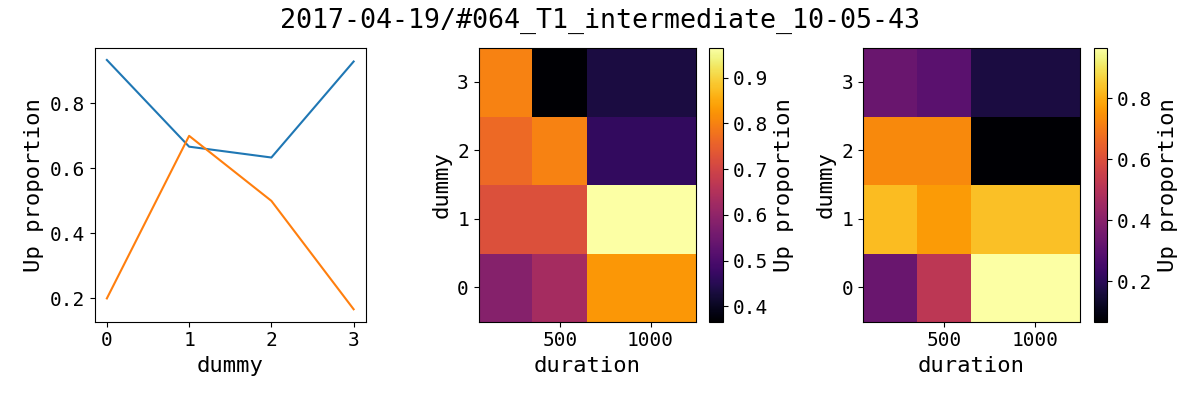

In [167]:
data = qc.load_data('2017-04-19/#064_T1_intermediate_10-05-43')
print(data)
plot = qc.MatPlot(subplots=3)
plot[0].add(data.up_proportion_2_0)
plot[0].add(data.up_proportion_5_0)

plot[1].add(data.up_proportion_6_2_0)
plot[2].add(data.up_proportion_6_5_0)
# T1_wait_times = data.duration_set[0]

# plot1 = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot1[0].add(T1_wait_times, data.amplitude_set[0], 
#              np.nanmean(data.up_proportion, 0))
# plot1[0].set_xlabel('Wait time (ms)')
# plot1[0].set_ylabel('Plunge voltage (V)')
# plot1[0].set_xscale('log')
# plot1[1].add(data.contrast)
# plot1[2].add(data.dark_counts_1_0)
# plot1.tight_layout()

<IPython.core.display.Javascript object>


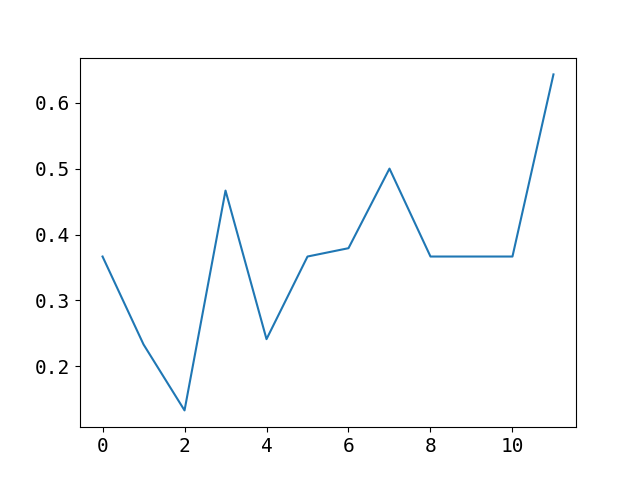

In [179]:
plt.figure()
plt.plot(data.up_proportion_5_0_0[0])

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-04-19/#162_T1_plunge_voltage_enabled_disabled_17-37-57'
   <Type>   | <array_id>                    | <array.name>              | <array.shape>
   Measured | voltage_difference_8_2        | voltage_difference        | (100,)
   Measured | voltage_difference_2_2        | voltage_difference        | (100,)
   Measured | up_proportion_5_0_0           | up_proportion             | (100, 12)
   Setpoint | dummy_set                     | dummy                     | (100,)
   Measured | contrast_8_0                  | contrast                  | (100,)
   Measured | up_proportion_11_0_0          | up_proportion             | (100, 12)
   Measured | num_traces_5_0_1              | num_traces                | (100, 12)
   Setpoint | index0_set_6                  | index0                    | (100, 2)
   Measured | optimal_set_vals_0_1          | optimal_set_vals          | (100, 2)
   Measured | retune_parameter_msmts_6_0    | retune_par

<IPython.core.display.Javascript object>


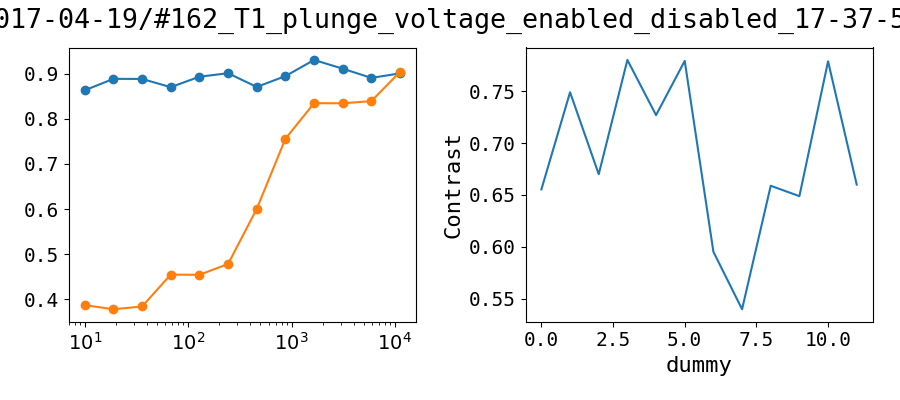

In [245]:
data = qc.load_data('2017-04-19/#162_T1_plunge_voltage_enabled_disabled_17-37-57')
print(data)
plot = qc.MatPlot(subplots=2)
plot[0].plot(data.duration_set_5[0], np.nanmean(data.up_proportion_5_0_0, axis=0), 'o-', label='adiabatic inversion')
plot[0].plot(data.duration_set_11[0], np.nanmean(data.up_proportion_11_0_0, axis=0), 'o-', label='no adiabatic inversion')
plot[0].set_xscale('log')

plot[1].add(data.contrast_2_0)

## Analysis of tunneling times

If the electron indeed would tunnel off to a different point, we would expect it to have a different tunneling time during readout.
To test this, we measure the traces for deep plunging for four different wait times.

In [363]:
base_location = qc.data.data_set.DataSet.default_io.base_location
base_folder = r'2017-04-20\#065_T1_plunge_voltage_enabled_disabled_10-52-52'
time_folder_names = {10:'tau_10.0', 
                     68:'tau_68.12920690579615',
                     464:'tau_464.1588833612782',
                     3162:'tau_3162.2776601683795'}
times = sorted(time_folder_names.keys())
modes = ['adiabatic', 'no_adiabatic']
traces_per_dataset = 100
points_per_trace = 2000
sampling_rate = 100e3
t_list = np.linspace(0, 2000/100e3, 2000) * 1e3

datasets = {'adiabatic': {},
            'no_adiabatic': {}}

for mode in datasets:
    for time, time_folder in time_folder_names.items():
        time_path = os.path.join(base_folder, mode, time_folder)
        time_full_path = os.path.join(base_location, time_path)
        trace_paths = [os.path.join(time_path, folder) 
                       for folder in os.listdir(time_full_path)]
        datasets[mode][time] = np.zeros((traces_per_dataset*len(trace_paths),
                                         points_per_trace))
        for k, trace_path in enumerate(trace_paths):
            data = qc.load_data(trace_path)
            datasets[mode][time][k*traces_per_dataset:(k+1)*traces_per_dataset] = data.acquisition_traces

<IPython.core.display.Javascript object>


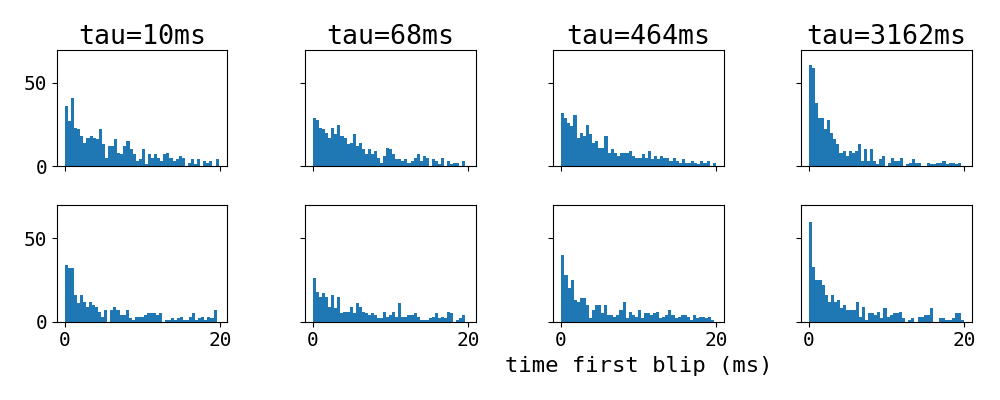

In [371]:
fig, axes = plt.subplots(2, 4, figsize=(10,4), sharey=True, sharex=True)

threshold = 0.4
for k1, mode in enumerate(modes):
    for k2, time in enumerate(times):
        dataset = datasets[mode][time]
        blip_idx = [np.argmax(trace[3:] > threshold) + 3
                    for trace in dataset
                    if max(trace[3:]) > threshold and trace[3] < threshold]
        t_blip = t_list[blip_idx]
        ax = axes[k1, k2]
        ax.hist(t_blip, bins=50)
        ax.set_ylim(0, 70)
        if  k1 == 0:
            ax.set_title('tau={}ms'.format(time))

axes[1,2].set_xlabel('time first blip (ms)')
plt.tight_layout()

<IPython.core.display.Javascript object>


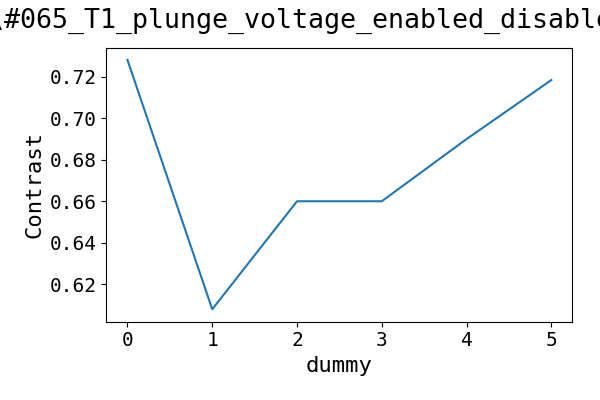

In [375]:
qc.MatPlot(data.contrast_2_0)

<IPython.core.display.Javascript object>


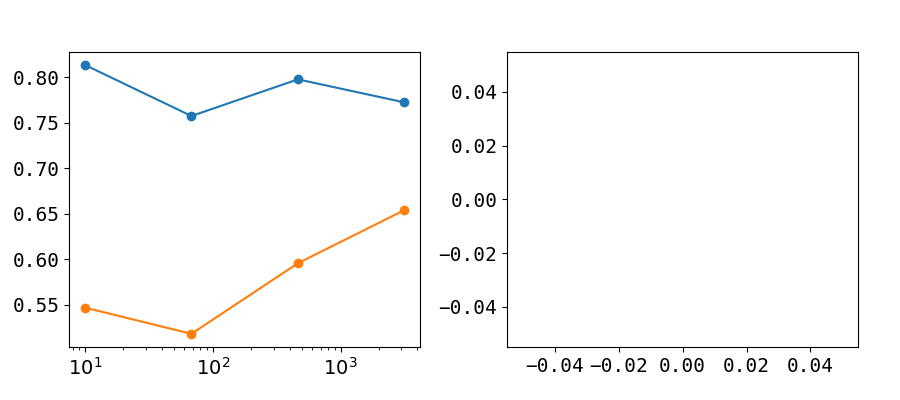

In [374]:
data = qc.load_data(r'2017-04-20\#065_T1_plunge_voltage_enabled_disabled_10-52-52')
plot = qc.MatPlot(subplots=2)
plot[0].plot(data.duration_set_5[0], np.nanmean(data.up_proportion_5_0_0, axis=0), 'o-', label='adiabatic inversion')
plot[0].plot(data.duration_set_11[0], np.nanmean(data.up_proportion_11_0_0, axis=0), 'o-', label='no adiabatic inversion')
plot[0].set_xscale('log')

The histogram above shows the durations until the first tunneling event.
The amount of fast tunneling clearly increases with increasing tau, indicating that there is indeed a different tunneling origin.